# 🧪 Classification Metrics Analysis

In this notebook, we explore and compare various **classification evaluation metrics** using `scikit-learn`.
Through multiple scenarios, we demonstrate how metrics like **Accuracy, Precision, Recall, Specificity, Balanced Accuracy, F1 Score, F2 Score, MCC**, and the **Confusion Matrix** behave under perfect predictions, class imbalance, false positives/negatives, and inverted predictions.

### ⚙️ Importing Libraries & Environment Setup

In [370]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.typing import NDArray
from sklearn.metrics import (
    accuracy_score,
    auc,
    average_precision_score,
    balanced_accuracy_score,
    confusion_matrix,
    f1_score,
    fbeta_score,
    matthews_corrcoef,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

In [371]:
%matplotlib inline

pd.set_option("display.width", 150)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)

### 🧰 Utility Functions

In [372]:
def specificity(y_true: NDArray[np.float64], y_pred: NDArray[np.float64]) -> float:
    """Compute the specificity.

    Args:
        y_true (NDArray[np.float64]): Ground truth (actual) values.
        y_pred (NDArray[np.float64]): Predicted values.

    Returns:
        float: specificity value.
    """
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) else 0

In [373]:
def evaluate_classification_metrics(
    y_true: NDArray[np.float64], y_pred: NDArray[np.float64]
) -> pd.DataFrame:
    """Evaluate classification metrics for a single prediction result.

    Args:
        y_true (np.ndarray): Ground truth values.
        y_pred (np.ndarray): Predicted values.

    Returns:
        pd.DataFrame: DataFrame of metrics.
    """
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "Specificity": specificity(y_true, y_pred),
        "Balanced Accuracy": balanced_accuracy_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred, zero_division=0),
        "F2 Score": fbeta_score(y_true, y_pred, beta=2, zero_division=0),
        "MCC": matthews_corrcoef(y_true, y_pred),
    }
    return pd.DataFrame(metrics, index=["Value"])

In [374]:
def plot_confusion_matrix(y_true: NDArray[np.int64], y_pred: NDArray[np.int64]) -> None:
    """Display a confusion matrix using seaborn heatmap.

    Args:
        y_true (NDArray[np.int64]): True labels.
        y_pred (NDArray[np.int64]): Predicted labels.
    """
    conf_matrix = confusion_matrix(y_true, y_pred)

    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
    )
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

In [375]:
def plot_roc_curve(y_true: NDArray[np.int64], y_probs: NDArray[np.int64]) -> None:
    """Plot the ROC curve and display the ROC-AUC score.

    Args:
        y_true (NDArray[np.int64]): True binary class labels.
        y_probs (NDArray[np.float64]): Predicted probabilities for the positive class.
    """
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)

    sns.set_theme(style="whitegrid")
    sns.set_palette("tab10")

    plt.plot(fpr, tpr, alpha=0.8, marker="o", label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], alpha=0.8, linestyle="--", label="Random guessing")

    plt.xlabel("FPR (False Positive Rate)")
    plt.ylabel("TPR (True Positive Rate)")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

In [376]:
def plot_precision_recall_curve(
    y_true: NDArray[np.int64], y_probs: NDArray[np.int64]
) -> None:
    """Plot the Precision-Recall curve and display the AP score.

    Args:
        y_true (NDArray[np.int64]): True binary class labels.
        y_probs (NDArray[np.float64]): Predicted probabilities for the positive class.
    """
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    ap = average_precision_score(y_true, y_probs)
    pr_auc = auc(recall, precision)

    sns.set_theme(style="whitegrid")
    sns.set_palette("tab10")

    plt.plot(
        recall,
        precision,
        alpha=0.8,
        marker="o",
        label=f"AP = {ap:.2f} | PR-AUC = {pr_auc:.2f}",
    )

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

### 📊 Comparing Metrics Versions

#### 📌 Threshold-based (label-only) metrics

##### Perfect Prediction

In [377]:
y_true = np.array([0, 0, 0, 1, 1, 1])
y_pred = np.array([0, 0, 0, 1, 1, 1])

evaluate_classification_metrics(y_true, y_pred)

,Accuracy,Precision,Recall,Specificity,Balanced Accuracy,F1 Score,F2 Score,MCC
Value,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Conclusion:**

* All metrics return ideal values:

  * Accuracy = 1.0
  * Precision = Recall = Specificity = F1 = F2 = Balanced Accuracy = MCC = 1.0
* The model perfectly classifies both positive and negative classes.

##### Class Imbalance — Model Predicts Only Majority Class

**Scenario:**

* True labels: 7 negatives, 3 positives
* Predicted: all negative (model ignores positives)

In [378]:
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

evaluate_classification_metrics(y_true, y_pred)

,Accuracy,Precision,Recall,Specificity,Balanced Accuracy,F1 Score,F2 Score,MCC
Value,0.7,0.0,0.0,1.0,0.5,0.0,0.0,0.0


**Conclusion:**

* Accuracy = 0.7, which is misleading.
* Precision and Recall = 0 → the model fails completely on the minority class.
* Balanced Accuracy reveals poor true positive rate.
* MCC = 0, indicating no correlation.

##### High Precision, Low Recall

**Scenario:**

* Model is very conservative in predicting positives.

In [379]:
y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

evaluate_classification_metrics(y_true, y_pred)

,Accuracy,Precision,Recall,Specificity,Balanced Accuracy,F1 Score,F2 Score,MCC
Value,0.6,1.0,0.2,1.0,0.6,0.333333,0.238095,0.333333


**Conclusion:**

* Precision is high because it avoids false positives.
* Recall is low — model misses many actual positives.
* F1 score drops due to poor recall.

📌 **Use case:** Acceptable in scenarios where **false positives are costly** (e.g., spam detection).

##### High Recall, Low Precision

**Scenario:**

* Model predicts many positives to catch all true positives.

In [380]:
y_true = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
y_pred = np.array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

evaluate_classification_metrics(y_true, y_pred)

,Accuracy,Precision,Recall,Specificity,Balanced Accuracy,F1 Score,F2 Score,MCC
Value,0.6,0.555556,1.0,0.2,0.6,0.714286,0.862069,0.333333


**Conclusion:**

* Recall is high — few false negatives.
* Precision is low — many false alarms.
* F1 is moderate; F2 is higher (emphasizing recall).
* MCC drops due to poor specificity.

📌 **Use case:** Useful when **missing true positives is critical**, e.g., medical diagnostics.

#### 📈 Probability-based metrics

##### Perfect Separation

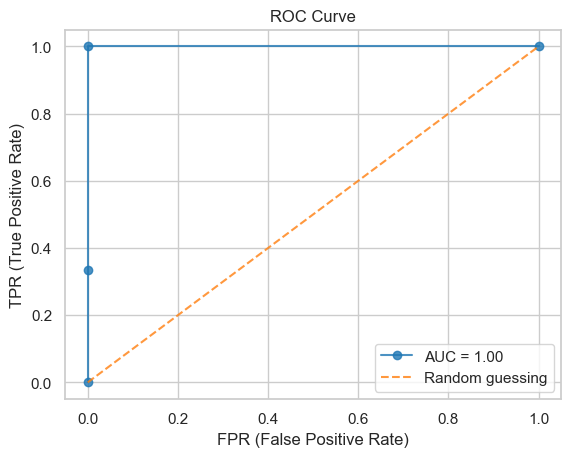

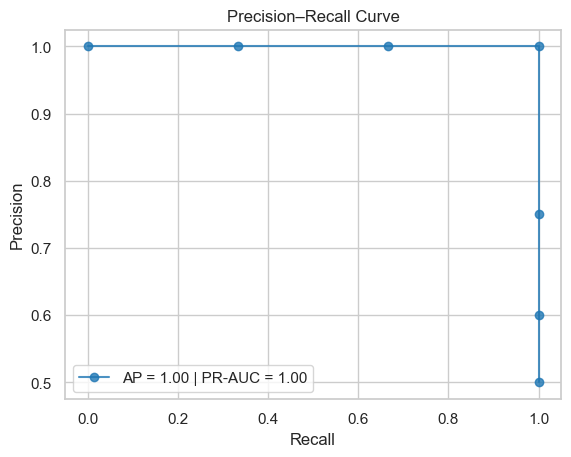

In [381]:
y_true = np.array([1, 1, 1, 0, 0, 0])
y_probs = np.array([0.9, 0.8, 0.7, 0.3, 0.2, 0.1])

plot_roc_curve(y_true, y_probs)
plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* ROC-AUC, AP, and PR-AUC are all 1 — perfect ranking and classification.
* Model flawlessly separates positives from negatives.
* No false positives or false negatives.

##### Poor Model Confusing Classes

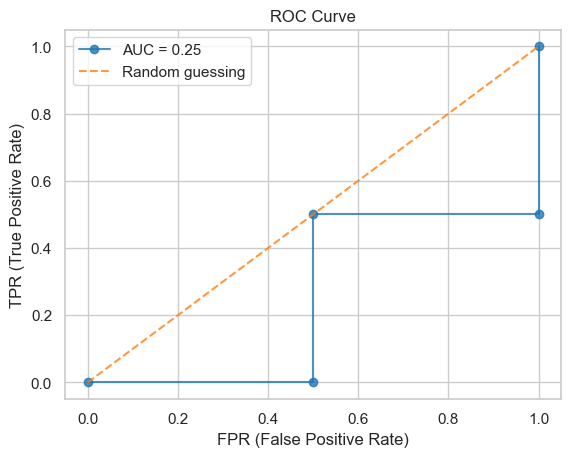

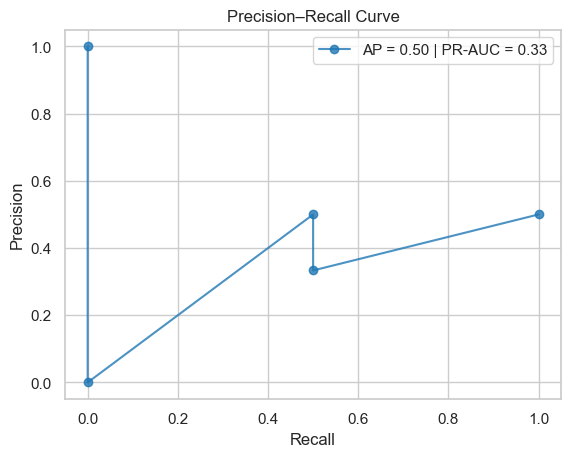

In [382]:
y_true = np.array([1, 1, 0, 0])
y_probs = np.array([0.5, 0.3, 0.6, 0.4])

plot_roc_curve(y_true, y_probs)
plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* ROC-AUC is below random guessing (0.25).
* AP and PR-AUC are low, showing poor precision-recall balance.
* Model assigns higher probabilities to negatives than positives.

##### Single Positive with Extreme Imbalance

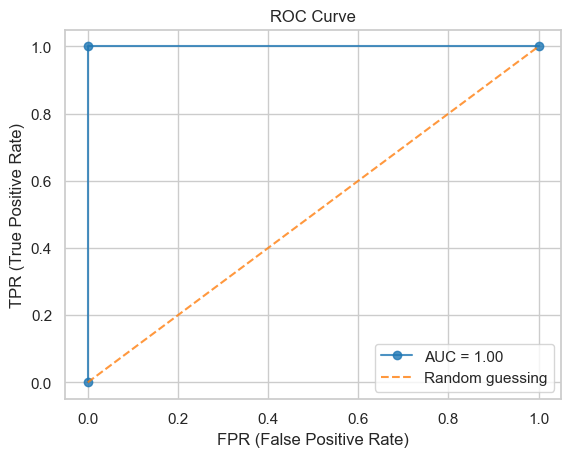

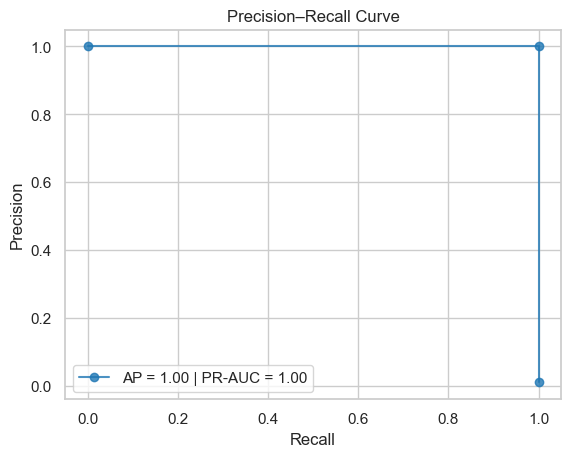

In [383]:
y_true = np.array([1] + [0] * 99)
y_probs = np.array([0.01] + [0.0] * 99)

plot_roc_curve(y_true, y_probs)
plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* ROC-AUC, AP, and PR-AUC equal 1 due to only one positive correctly scored highest.
* Extreme class imbalance makes metrics appear perfect.
* Metrics do not reflect real-world robustness here.

##### Moderate Imbalance, Good Model

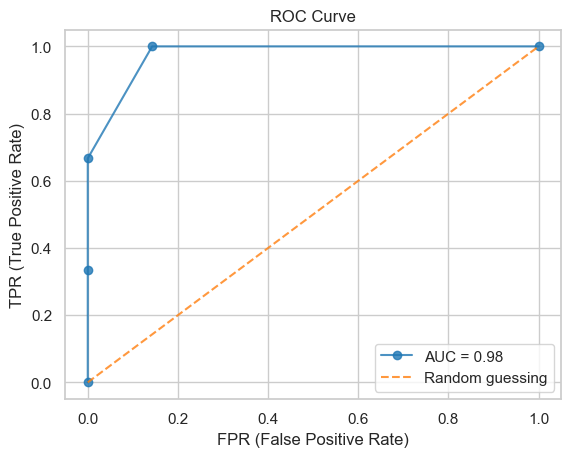

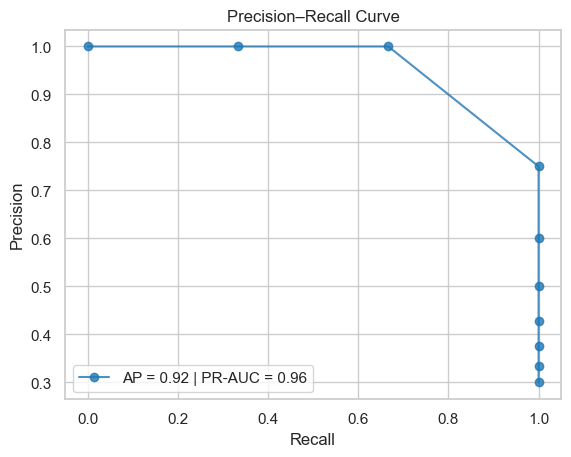

In [384]:
y_true = np.array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0])
y_probs = np.array([0.9, 0.8, 0.7, 0.6, 0.85, 0.5, 0.8, 0.4, 0.3, 0.2])

plot_roc_curve(y_true, y_probs)
plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* ROC-AUC (0.98), AP (0.92), and PR-AUC (0.96) are high.
* Model ranks positives well despite some negatives.
* Good trade-off between precision and recall.

##### High False Positive Scores

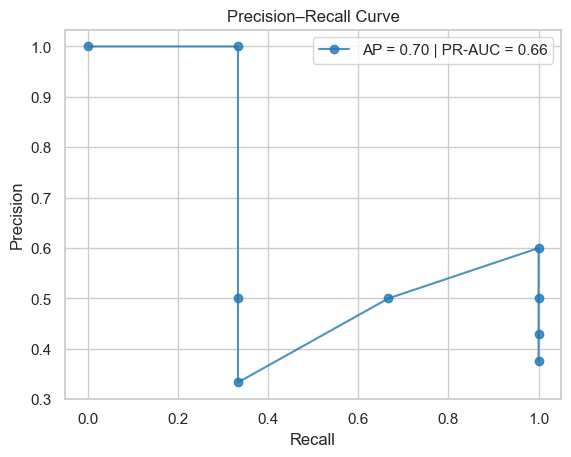

In [385]:
y_true = np.array([1, 1, 1, 0, 0, 0, 0, 0])
y_probs = np.array([0.99, 0.8, 0.75, 0.9, 0.85, 0.7, 0.6, 0.3])

plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* AP = 0.70, PR-AUC = 0.66 indicate many false positives with high scores.
* Precision suffers despite relatively good average precision.
* False alarms reduce overall confidence.

##### Single Positive + High Scores for Negatives

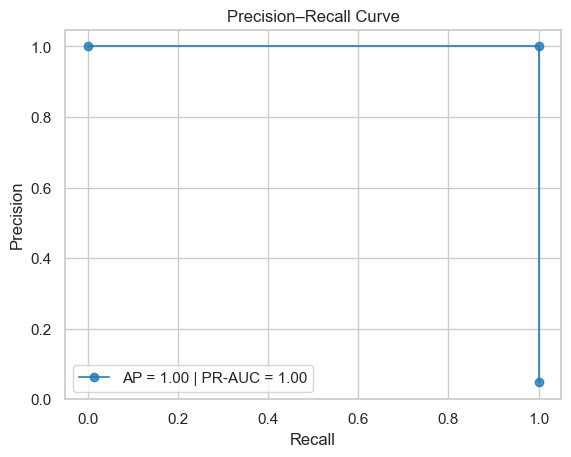

In [386]:
y_true = np.array([1] + [0] * 20)
y_probs = np.array([0.9] + [0.8] * 20)

plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* AP and PR-AUC are 1, but only because of one positive ranked highest.
* Many negatives have similarly high scores, causing potential instability.
* Metrics may be misleading.

##### Balanced Model (3 Positives, 2 Negatives)

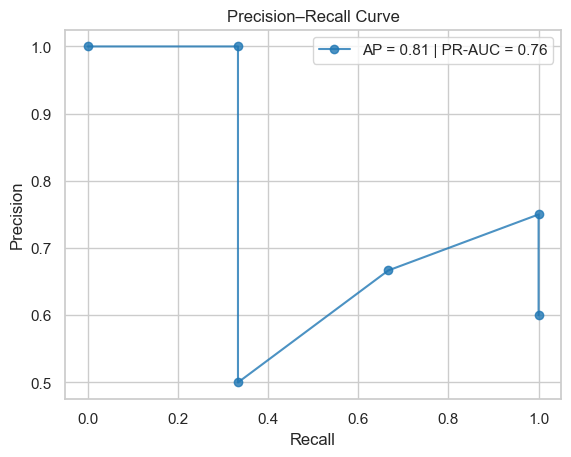

In [387]:
y_true = np.array([1, 0, 1, 1, 0])
y_probs = np.array([0.9, 0.8, 0.7, 0.6, 0.5])

plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* AP = 0.81 and PR-AUC = 0.76 show moderate model performance.
* Precision-recall curve has stair-step behavior causing difference in AP and PR-AUC.
* Decent separation of classes.

##### Mixed Probabilities, Weak Confidence

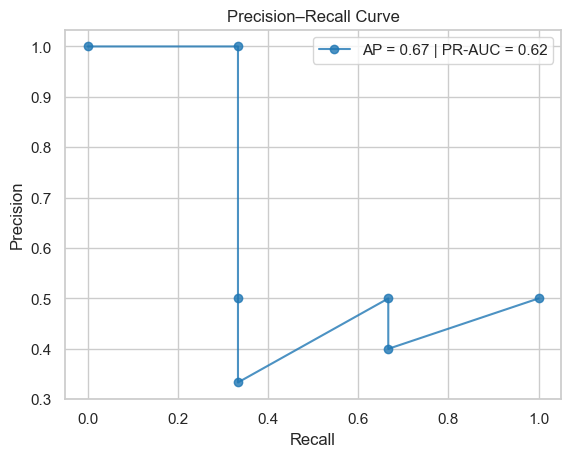

In [388]:
y_true = np.array([1, 0, 0, 1, 0, 1])
y_probs = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4])

plot_precision_recall_curve(y_true, y_probs)

**Conclusion:**

* AP = 0.67 and PR-AUC = 0.62 reflect weak class distinction.
* Precision and recall fluctuate due to overlapping scores.
* Model needs improvements to reduce uncertainty.